In [1]:
%pip install matplotlib numpy pillow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy
import PIL
import os
import json
import cv2

In [2]:
numpy.version.full_version

'1.24.1'

In [3]:
DATASET_PATH = '/home/s0214/_scratch2/MonSter/datasets/us3d'
TRUTH_PATH = os.path.join(DATASET_PATH, 'disp')
RGB_PATH = os.path.join(DATASET_PATH, 'images')

In [4]:
filenames = os.listdir(TRUTH_PATH)
filenames.sort()

In [5]:
for filename in filenames:
    if "163_001" in filename:
        print(filename)
        break


OMA163_001_033_LEFT_DSP.tif


In [7]:
cls_image_path = os.path.join(TRUTH_PATH, filenames[0])
cls2_image_path = os.path.join(TRUTH_PATH, filenames[2])
dsp_image_path = os.path.join(TRUTH_PATH, filenames[1])
(cls_image_path, dsp_image_path)

('/home/s0214/_scratch2/MonSter/datasets/dfc/Track2-Truth/JAX_004_009_007_LEFT_CLS.tif',
 '/home/s0214/_scratch2/MonSter/datasets/dfc/Track2-Truth/JAX_004_009_007_LEFT_DSP.tif')

In [8]:
cls_image, cls2_image, dsp_image = (PIL.Image.open(path) for path in (cls_image_path, cls2_image_path, dsp_image_path))

In [9]:
cls_image_numpy = numpy.array(cls_image)

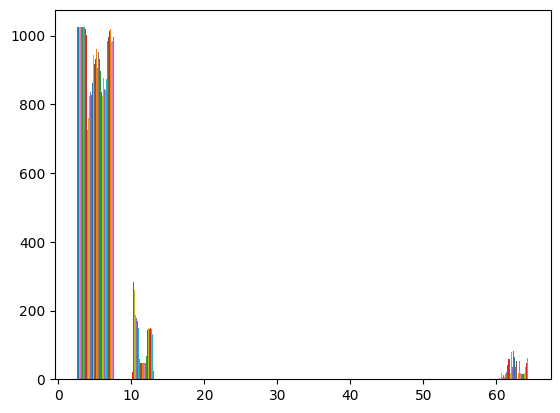

In [10]:
n, bins, patches = plt.hist(cls_image_numpy)

In [12]:
patches

<a list of 1024 BarContainer objects>

In [13]:
cls_image.size

(1024, 1024)

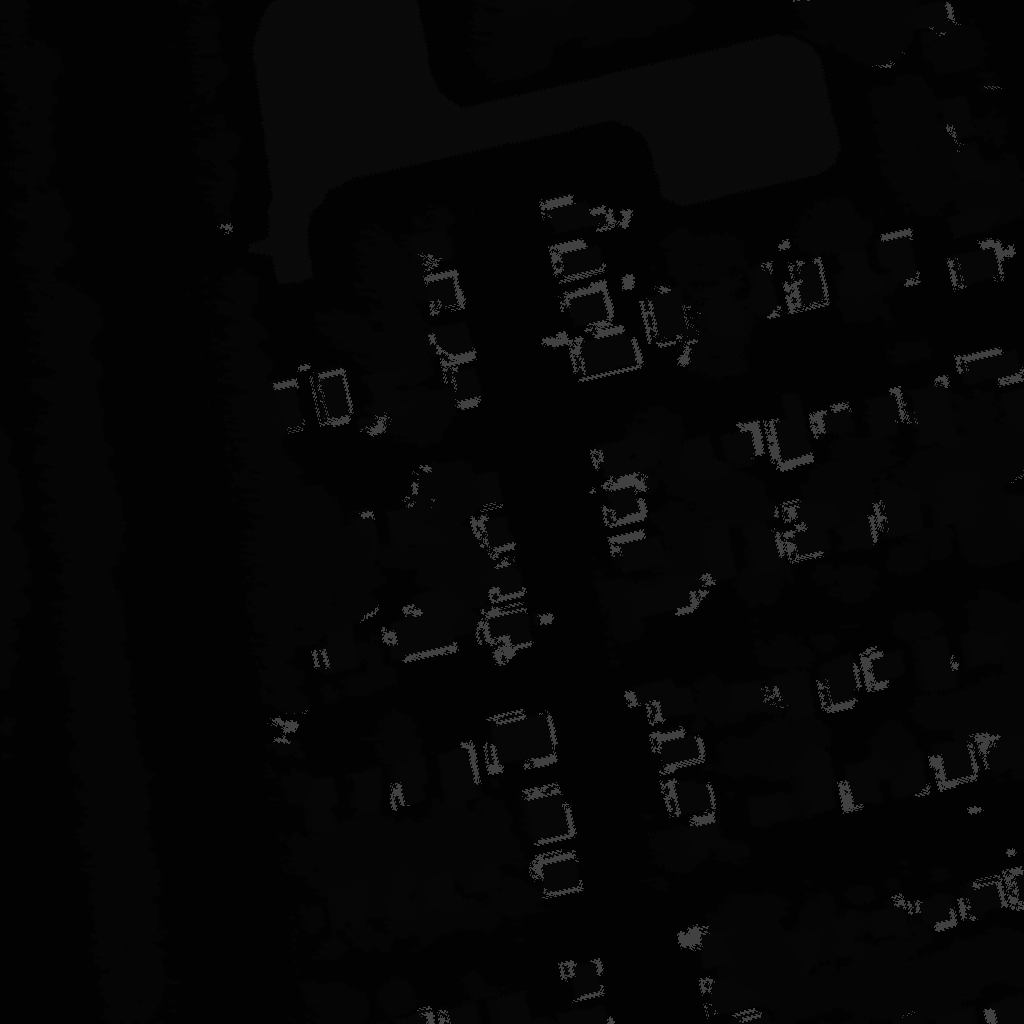

In [14]:
cls_image

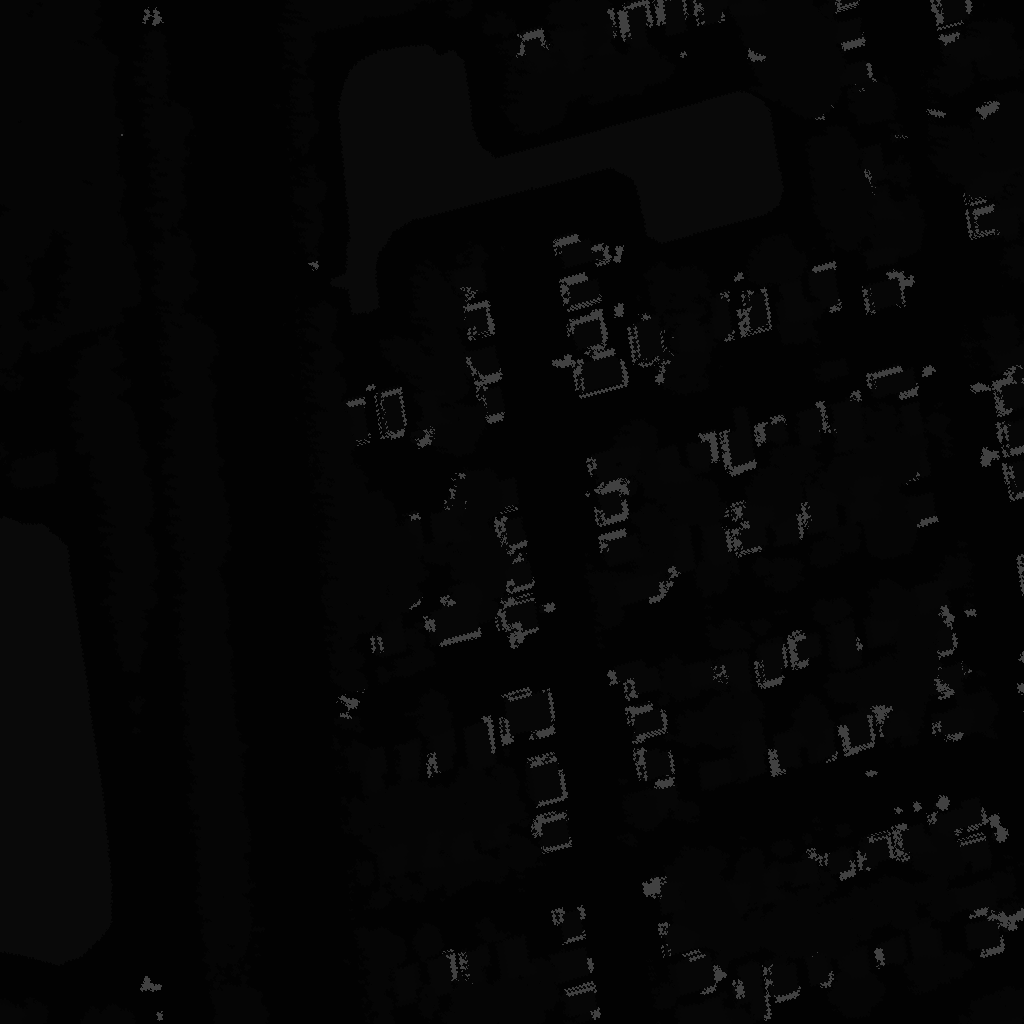

In [15]:
cls2_image

In [11]:
dsp_image_numpy = numpy.array(dsp_image)

In [13]:
dsp_image_numpy

array([[   5.,    5., -999., ..., -999.,    0.,    0.],
       [   5.,    5., -999., ...,    0.,    0.,    0.],
       [   5., -999.,    6., ...,    0.,   -1.,   -1.],
       ...,
       [-999., -999., -999., ..., -999.,    1., -999.],
       [-999., -999., -999., ...,    1.,    1., -999.],
       [-999., -999., -999., ...,    1.,    1., -999.]], dtype=float32)

In [16]:
numpy.unique(dsp_image_numpy)

array([-999.,   -4.,   -3.,   -2.,   -1.,    0.,    1.,    2.,    3.,
          4.,    5.,    6.,    7.,    8.,    9.,   10.,   11.,   12.,
         13.,   14.,   15.,   16.], dtype=float32)

In [14]:
cls_image_numpy

array([[5, 5, 5, ..., 2, 2, 2],
       [5, 5, 5, ..., 2, 2, 2],
       [5, 5, 5, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 6, 6, 6],
       [2, 2, 2, ..., 6, 6, 6],
       [2, 2, 2, ..., 5, 6, 6]], dtype=uint8)

In [17]:
numpy.unique(cls_image_numpy)

array([ 2,  5,  6,  9, 65], dtype=uint8)

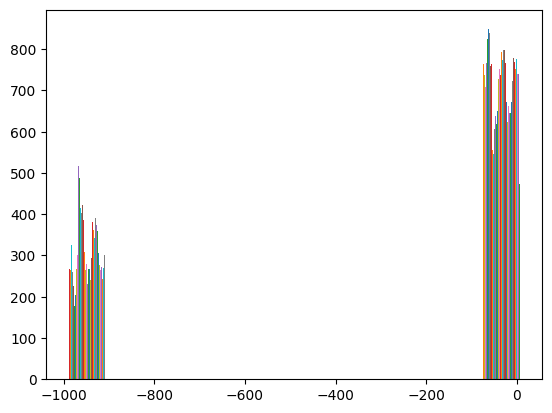

In [18]:
n, bins, patches = plt.hist(dsp_image_numpy)

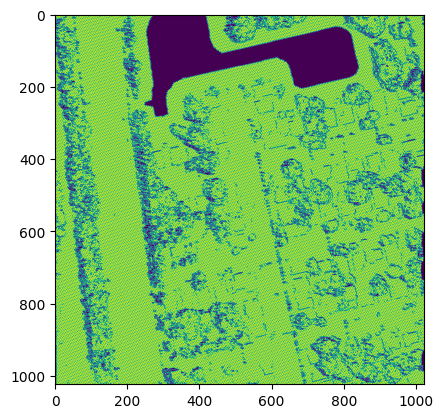

In [19]:
fig, ax = plt.subplots()
ax.imshow(dsp_image_numpy)

In [6]:
rgb_filenames = os.listdir(RGB_PATH)
rgb_filenames.sort()

In [7]:
for filename in rgb_filenames:
    if "AGL" in filename:
        print(filename)
        break

In [9]:
left_agl_path, left_rgb_path, metadata_path, right_rgb_path = (os.path.join(RGB_PATH, filename) for filename in rgb_filenames[:4])

In [10]:
left_rgb_numpy, right_rgb_numpy = (numpy.array(PIL.Image.open(path)) for path in (left_rgb_path, right_rgb_path))

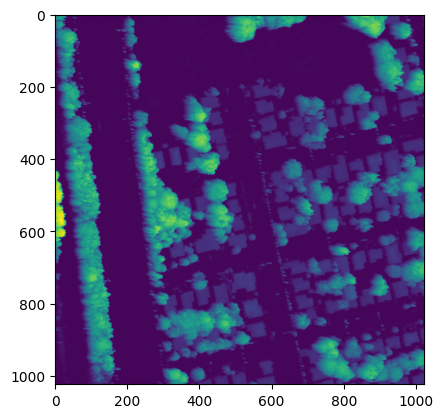

In [24]:
fig, ax = plt.subplots()
ax.imshow(left_agl_numpy)

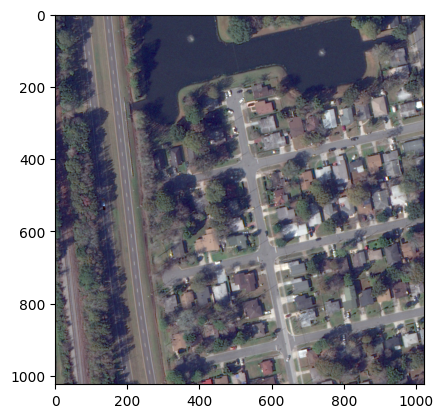

In [11]:
fig, ax = plt.subplots()
ax.imshow(left_rgb_numpy)

In [12]:
left_rgb_numpy.shape, right_rgb_numpy.shape

((1024, 1024, 3), (1024, 1024, 3))

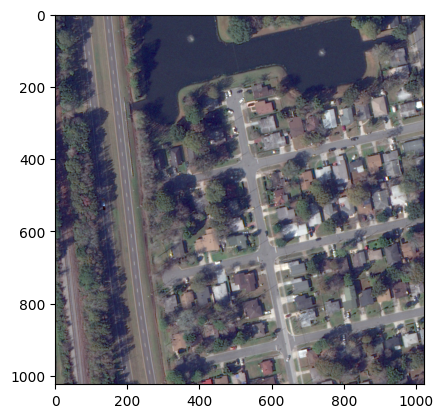

In [26]:
fig, ax = plt.subplots()
ax.imshow(right_rgb_numpy)

In [27]:
!cat $metadata_path

{
    "dmax": 128,
    "dmin": -128,
    "left_homography": [
        [
            0.0032273993169601983,
            -0.012454047127358734,
            20.911560244919773
        ],
        [
            0.011734060004543108,
            0.0028436375358997738,
            -3.295693362943316
        ],
        [
            -1.0482877063302282e-08,
            3.568143974621157e-08,
            0.01135052957271769
        ]
    ],
    "left_nitf_metadata": {
        "AREA_OR_POINT": "Area",
        "NITF_ABPP": "11",
        "NITF_CCS_COLUMN": "0",
        "NITF_CCS_ROW": "0",
        "NITF_CLEVEL": "06",
        "NITF_ENCRYP": "0",
        "NITF_FBKGC": "126,126,126",
        "NITF_FDT": "20170123150505",
        "NITF_FHDR": "NITF02.10",
        "NITF_FSCLAS": "U",
        "NITF_FSCLSY": "US",
        "NITF_FSCOP": "00000",
        "NITF_FSCPYS": "00000",
        "NITF_FSCTLH": "1",
        "NITF_FTITLE": "21JAN15WV031100015JAN21161253-M1BS-500648062050_01_P001         GA E0AAAAAAKA

In [28]:
print(left_agl_numpy.shape)
print(left_agl_numpy.min(), left_agl_numpy.max())
print(left_agl_numpy.dtype)
print(left_agl_numpy.mean())
print(left_agl_numpy.std())
print(left_agl_numpy.var())


(1024, 1024)
-0.36700058 25.021135
float32
3.3741448
5.073595
25.741365


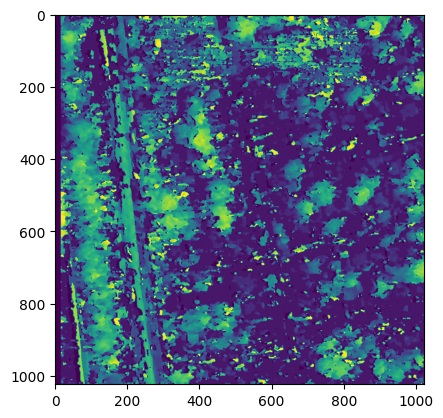

In [56]:
left_rgb = cv2.imread(left_rgb_path)
right_rgb = cv2.imread(right_rgb_path)

min_disp = 0
num_disp = 16
stereo = cv2.StereoSGBM_create(minDisparity=min_disp, numDisparities=num_disp, blockSize=7, uniquenessRatio=3, speckleWindowSize=50, speckleRange=32, disp12MaxDiff=1, P1=8*3*5**2, P2=32*3*5**2)
stereo_disparity = stereo.compute(left_rgb, right_rgb)
stereo_disparity = numpy.array(stereo_disparity)
stereo_disparity.shape
stereo_disparity
plt.imshow(stereo_disparity / 16)


In [30]:
# evaluate epe and d1 for stereo disparity and left_agl_numpy
# Calculate EPE (End-Point Error) and D1 error between stereo_disparity and left_agl_numpy

# Ensure both arrays are float32 and same shape
gt = left_agl_numpy.astype(numpy.float32)
pred = (stereo_disparity / 16).astype(numpy.float32)
# pred = numpy.random.randn(*pred.shape) * 1
if pred.shape != gt.shape:
    # Resize pred to match gt if needed
    pred = cv2.resize(pred, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_LINEAR)

# Mask for valid ground truth (ignore -999 and other invalids)
valid_mask = (gt != -999)

# EPE: mean absolute error on valid pixels
epe = numpy.abs(pred[valid_mask] - gt[valid_mask]).mean()

# D1: percentage of pixels where error > 3.0 and > 5% of gt
abs_err = numpy.abs(pred - gt)
rel_err = abs_err / numpy.maximum(numpy.abs(gt), 1e-6)
d1_mask = (abs_err > 3.0) & (rel_err > 0.05) & valid_mask
d1 = 100.0 * d1_mask.sum() / valid_mask.sum()

print(f"EPE: {epe:.4f}")
print(f"D1: {d1:.2f}%")


EPE: 3.5784
D1: 42.64%


In [31]:
# Load the model based on evaluate_stereo.py

import torch
import argparse
import os
import sys

# Add the root directory to PYTHONPATH if needed
sys.path.append(os.path.abspath(".."))

from evaluate_stereo import Monster, count_parameters

# Set up dummy args similar to evaluate_stereo.py
class Args:
    restore_ckpt = "./checkpoints/mix_all.pth"  # Change to your checkpoint path
    dataset = "sceneflow"
    mixed_precision = False
    valid_iters = 32
    encoder = "vitl"
    hidden_dims = [128]*3
    corr_implementation = "reg"
    shared_backbone = False
    corr_levels = 2
    corr_radius = 4
    n_downsample = 2
    slow_fast_gru = False
    n_gru_layers = 3
    max_disp = 192

args = Args()

# Instantiate model
model = torch.nn.DataParallel(Monster(args), device_ids=[0])

# Load checkpoint
if args.restore_ckpt is not None:
    assert args.restore_ckpt.endswith(".pth")
    assert os.path.exists(args.restore_ckpt), f"Checkpoint not found: {args.restore_ckpt}"
    checkpoint = torch.load(args.restore_ckpt, map_location="cuda")
    ckpt = dict()
    if 'state_dict' in checkpoint.keys():
        checkpoint = checkpoint['state_dict']
    for key in checkpoint:
        if key.startswith("module."):
            ckpt[key] = checkpoint[key]
        else:
            ckpt["module." + key] = checkpoint[key]
    model.load_state_dict(ckpt, strict=True)

model.cuda()
model.eval()

print(f"The model has {count_parameters(model)/1e6:.2f}M learnable parameters.")

xFormers not available
xFormers not available


DepthAnythingV2 out_channels [256, 512, 1024, 1024]
DepthAnythingV2_decoder out_channels [256, 512, 1024, 1024]
The model has 53.38M learnable parameters.


In [34]:
left_rgb_numpy_resized = cv2.resize(left_rgb_numpy, (512, 512))
right_rgb_numpy_resized = cv2.resize(right_rgb_numpy, (512, 512))
left_rgb_tensor = torch.from_numpy(left_rgb_numpy_resized).unsqueeze(0).permute(0, 3, 1, 2).cuda()
right_rgb_tensor = torch.from_numpy(right_rgb_numpy_resized).unsqueeze(0).permute(0, 3, 1, 2).cuda()
# resize to 512 x 512
left_rgb_tensor.shape, right_rgb_tensor.shape


(torch.Size([1, 3, 512, 512]), torch.Size([1, 3, 512, 512]))

In [35]:
pred = model(left_rgb_tensor, right_rgb_tensor)

/home/s0214/.conda/envs/monster/lib/python3.8/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [36]:
preds0_numpy = pred[0].detach().cpu().numpy().squeeze(0).squeeze(0)


In [37]:
preds1_numpy = pred[1][0].detach().cpu().numpy().squeeze(0).squeeze(0)
preds11_numpy = pred[1][1].detach().cpu().numpy().squeeze(0).squeeze(0)
preds18_numpy = pred[1][8].detach().cpu().numpy().squeeze(0).squeeze(0)

In [38]:
for subpred in pred[1]:
    print(type(subpred))
pred

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


(tensor([[[[15.1178, 17.9527, 19.9564,  ...,  6.5852,  4.8451,  6.1549],
           [12.8767, 12.6770, 13.9892,  ...,  4.1400,  5.6429,  8.1541],
           [19.9047, 16.7587, 20.6777,  ...,  3.6702,  6.3556,  8.7885],
           ...,
           [84.6905, 76.1532, 66.7950,  ...,  3.9260,  3.4693,  3.2116],
           [65.8434, 57.3340, 58.8753,  ...,  3.5491,  3.2202,  2.8607],
           [58.9583, 56.8421, 56.9668,  ...,  3.4764,  3.1979,  3.0386]]]],
        device='cuda:0', grad_fn=<UnsqueezeBackward0>),
 [tensor([[[[18.9782, 17.8834, 14.2189,  ...,  4.8931,  4.6951,  5.0227],
            [13.2468, 11.7266, 12.0721,  ...,  4.9906,  4.9958,  5.0948],
            [23.5270, 22.1892, 22.6517,  ...,  4.7016,  5.0251,  5.0791],
            ...,
            [78.6632, 79.3912, 79.0095,  ...,  2.5748,  2.8023,  3.6250],
            [78.7415, 77.4692, 76.8660,  ...,  2.5091,  2.7458,  3.4003],
            [78.6673, 77.2455, 77.1477,  ...,  3.1797,  3.4406,  5.2923]]]],
         device='cuda:0

In [44]:
preds2_numpy = pred[2].detach().cpu().numpy().squeeze(0).squeeze(0)


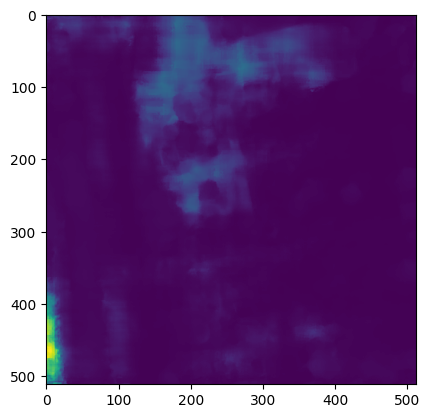

In [39]:
plt.imshow(preds0_numpy)

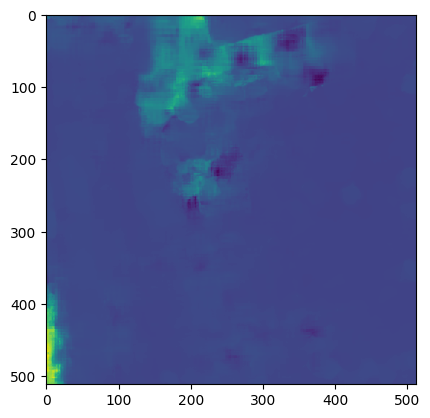

In [40]:
plt.imshow(preds1_numpy)

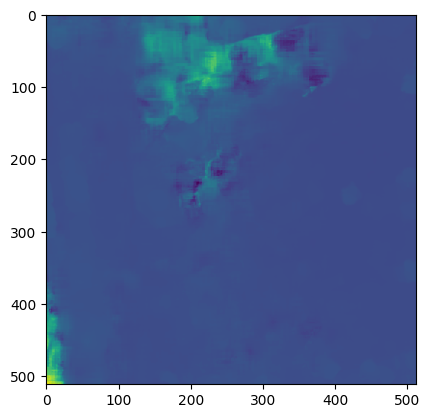

In [41]:
plt.imshow(preds11_numpy)

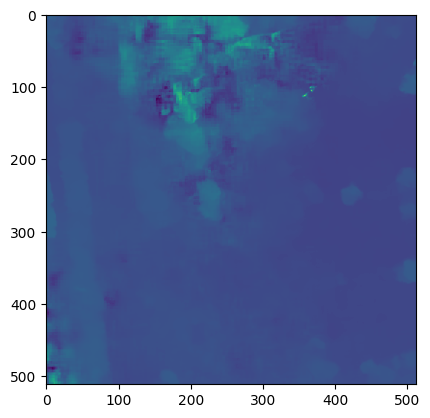

In [42]:
plt.imshow(preds18_numpy)

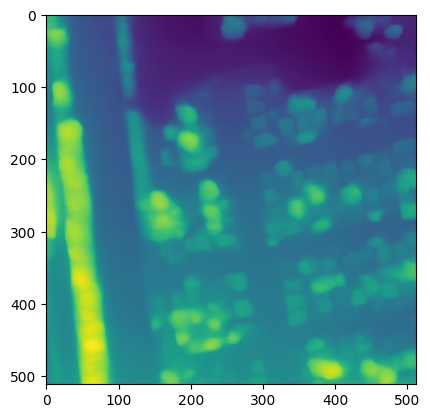

In [45]:
plt.imshow(preds2_numpy / 41)

In [46]:
preds2_numpy.min(), preds2_numpy.max()

(41.321796, 161.62398)

In [52]:
# evaluate epe and d1 for stereo disparity and left_agl_numpy
# Calculate EPE (End-Point Error) and D1 error between stereo_disparity and left_agl_numpy

# Ensure both arrays are float32 and same shape
gt = left_agl_numpy.astype(numpy.float32)
pred2 = (preds2_numpy / 41).astype(numpy.float32)
# pred = numpy.random.randn(*pred.shape) * 1
if pred2.shape != gt.shape:
    # Resize pred to match gt if needed
    pred2 = cv2.resize(pred2, (gt.shape[1], gt.shape[0]), interpolation=cv2.INTER_LINEAR)

# Mask for valid ground truth (ignore -999 and other invalids)
valid_mask = (gt != -999)

# EPE: mean absolute error on valid pixels
epe = numpy.abs(pred2[valid_mask] - gt[valid_mask]).mean()

# D1: percentage of pixels where error > 3.0 and > 5% of gt
abs_err = numpy.abs(pred2 - gt)
rel_err = abs_err / numpy.maximum(numpy.abs(gt), 1e-6)
d1_mask = (abs_err > 3.0) & (rel_err > 0.05) & valid_mask
d1 = 100.0 * d1_mask.sum() / valid_mask.sum()

print(f"EPE: {epe:.4f}")
print(f"D1: {d1:.2f}%")


EPE: 3.3558
D1: 24.14%


In [49]:
KITTI_PATH = '/home/s0214/_scratch2/MonSter/datasets/kitti/testing/image_2'
kitti_filenames = os.listdir(KITTI_PATH)
kitti_filenames.sort()
kitti_filenames[:10]

FileNotFoundError: [Errno 2] No such file or directory: '/home/s0214/_scratch2/MonSter/datasets/kitti/testing/image_2'